<a href="https://colab.research.google.com/github/jaime-escobedo-tec/SeriesDeTiempo-Tec/blob/main/Sesion2_JJEG_112233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## Jaime Jova.... 112233
### Sesión 2 - 15 feb 2023


Crea una lista que contenga los integrantes de tu famila

In [1]:
mifamilia= ['Mr X', 'Miss X', 'hijo X', 'hija X']

In [2]:
mifamilia

['Mr X', 'Miss X', 'hijo X', 'hija X']

Vamos a elegir el integrante 1, *Nota: python comienza a contar desde cero*

In [3]:
mifamilia[0]

'Mr X'

creamos una lista que contenga números

In [4]:
numeros =[12, 6, 7, 15, 2]

In [5]:
numeros

[12, 6, 7, 15, 2]

importamos un par de librerias/módulos. Que nos ayudaran a manejar números

In [6]:
import numpy as np
import pandas as pd

Calcularemos la media de estos números y los ordenaremos

In [7]:
# primero convertimos estos numeros en arreglo
numeros = np.array(numeros)

In [8]:
type(numeros)

numpy.ndarray

In [10]:
#calculamos la media y redondeamos a un decimal
numeros.mean().round(1)

8.4

In [11]:
numeros

array([12,  6,  7, 15,  2])

In [12]:
#ordenamos los números con .sort()
numeros.sort()

In [13]:
numeros

array([ 2,  6,  7, 12, 15])

In [14]:
#mostramos los números
numeros

array([ 2,  6,  7, 12, 15])

Pandas utiliza una estructura de datos llamada **DataFrames**, que no son otra cosa que datos organizados en filas y columnas

In [15]:
##creamos un diccionario 
dic_grupo = {'nombre':['Juan','Ale', 'Jime', 'David'], 
             'Edad':[23,14,28,18],
             'calificación':[90,70,45,85]}

In [16]:
##vemos su contenido
dic_grupo

{'nombre': ['Juan', 'Ale', 'Jime', 'David'],
 'Edad': [23, 14, 28, 18],
 'calificación': [90, 70, 45, 85]}

In [18]:
## ahora lo convertimos en DataFrame con pandas
grupox = pd.DataFrame(dic_grupo)

In [19]:
# ahora vemos el dataframe
grupox

,nombre,Edad,calificación
0,Juan,23,90
1,Ale,14,70
2,Jime,28,45
3,David,18,85


In [20]:
# El nombre de las columnas se llama columns
grupox.columns

Index(['nombre', 'Edad', 'calificación'], dtype='object')

In [21]:
# el nombre de las filas se llama Index
grupox.index

RangeIndex(start=0, stop=4, step=1)

In [22]:
# vemos su estructura con shape
grupox.shape

(4, 3)

In [23]:
# seleccionamos la columna nombre
grupox['nombre']

0     Juan
1      Ale
2     Jime
3    David
Name: nombre, dtype: object

In [24]:
# seleccionamos la columna Edad
grupox['Edad']

0    23
1    14
2    28
3    18
Name: Edad, dtype: int64

In [27]:
# seleccionamos la columna edad y la columna nombre
grupox[['nombre', 'Edad']]

,nombre,Edad
0,Juan,23
1,Ale,14
2,Jime,28
3,David,18


## Repaso de inferencia

Vamos a instalar yahoo finance para descargar precio de las acciones  

In [ ]:
pip install yfinance

ya instalada la libreria, podemos decirle a python que la use

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

ahora importamos los datos de las acciones de walmart de México

In [31]:
walmex = yf.download('WALMEX.MX', 
                       start='2017-01-01', 
                       end='2017-12-31',
                       progress=False)

damos una mirada rápida a lo que contiene este dataframe con .head()

In [32]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,37.099998,37.500000,37.049999,37.049999,32.116283,842718
2017-01-03,37.540001,37.840000,37.450001,37.680000,32.662388,10727225
2017-01-04,37.820000,37.849998,37.500000,37.750000,32.723068,20056831
2017-01-05,37.750000,37.849998,36.950001,37.410000,32.428345,34325666
2017-01-06,37.520000,37.750000,36.439999,36.529999,31.665522,51254600


Grafiquemos el precio de las acciones de walmex

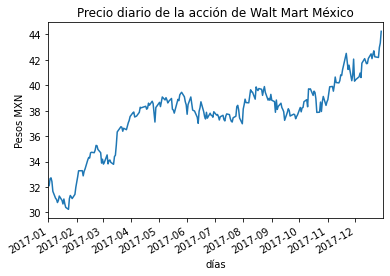

In [38]:
walmex['Adj Close'].plot()
plt.title('Precio diario de la acción de Walt Mart México')
plt.ylabel('Pesos MXN')
plt.xlabel('días')
plt.xlim('2017-01-01', '2017-12-31')
plt.show()

Vamos a renombrar Adj Close

In [40]:
 walmex = walmex.rename(columns={'Adj Close':'adj_close'})

Vamos a calcular los return (rendimiento) de las acciones de walmart, usando .pct_change() de pandas

In [41]:
walmex['return'] = walmex['adj_close'].pct_change()

In [42]:
walmex.head()

,Open,High,Low,Close,adj_close,Volume,return
Date,,,,,,,
2017-01-02,37.099998,37.500000,37.049999,37.049999,32.116283,842718,NaN
2017-01-03,37.540001,37.840000,37.450001,37.680000,32.662388,10727225,0.017004
2017-01-04,37.820000,37.849998,37.500000,37.750000,32.723068,20056831,0.001858
2017-01-05,37.750000,37.849998,36.950001,37.410000,32.428345,34325666,-0.009007
2017-01-06,37.520000,37.750000,36.439999,36.529999,31.665522,51254600,-0.023523


Vamos a ver su histograma

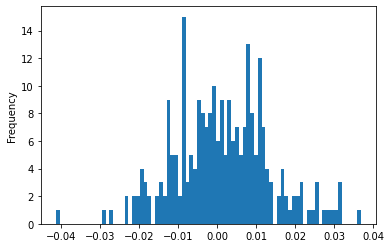

In [47]:
walmex['return'].plot.hist(bins=80);

In [50]:
# precio promedio 2017
walmex['adj_close'].mean().round(3)

37.599

In [52]:
# mean return
walmex['return'].mean().round(6)

0.001359

Supongamos que ahora, alguien nos pregunta qué cuál es el rendimiento promedio de las acciones de walt-mart México.

Note que nosotros tenemos una muestra, los datos del año 2017.

La población total, o los datos completos serían los datos de todos los años que existirá walmart de México, los años pasados y futuros.

Nos gustaria construir un intervalo de confianza del 95% para el precio de las acciones de walmart

Recuerde que si el intervalo de confianza al 95% de confianza es

IC(95%) = media +- 1.96 SE 



In [53]:
media = walmex['return'].mean()
desv_est = walmex['return'].std(ddof=1) # desv est de una muestra
 

In [54]:
limite_superior = media + (1.96* desv_est)
limite_inferior = media - (1.96* desv_est)

In [56]:
limite_inferior.round(4), limite_superior.round(4)

(-0.0229, 0.0256)

Ahora nos gustaria probar la hipótesis de que el rendimiento de las acciones de walmart es 0.0006 

$H_0: \mu=0.0006$

$H_a: \mu \neq 0.0006$


p-value es el nivel de signifancia exacto de la prueba de hipótesis 

In [ ]:
from scipy.stats import norm

In [ ]:
prob_ztest = norm.cdf(z_test).round(2)
## como es una prueba de 2 colas el p-value es 2 veces
## prob_ztest
p_value = 2 * prob_ztest

Regla de decisión: si el **p-valor**$ < \alpha $ entonces rechazar $H_0$.